## **<h3 align="center"> Deep Learning - Project </h3>**
# **<h3 align="center"> Phylum Chordata - Xana/Sven</h3>**
**Group 4 members:**<br>
Alexandra Pinto - 20211599@novaims.unl.pt - 20211599<br>
Steven Carlson - 20240554@novaims.unl.pt - 20240554<br>
Sven Goerdes - 20240503@novaims.unl.pt - 20240503<br>
Tim Straub - 20240505@novaims.unl.pt - 20240505<br>
Zofia Wojcik  - 20240654@novaims.unl.pt - 20240654<br>

# Table of Contents
* [1. Introduction](#intro)
* [2. Setup](#setup)
* [3. Data Loading](#dataloading)
* [4. Image Preprocessing](#imagepreprocessing)
    * [4.1. Simple Resize](#simple_resize)
    * [4.2. More Complex Preprocess](#more_complex_preproc)
* [5. Prepare the Data for the Model](#imagepreprocessing)
* [6. Convolutional Neural Networks Models](#cnnmodels)
    * [6.1. Baseline Model](#baseline_model)
    * [6.2. Baseline Model With Data Augmentation](#baseline_model_data_aug)




# 1. Introduction <a class="anchor" id="intro"></a>

In this third notebook, we will preprocess images from the **Chordata** phylum and develop a deep learning model to accurately classify them at the family level.

# 2. Setup <a class="anchor" id="setup"></a>
In this section, we will import the necessary libraries that will be used throughout the notebook. These libraries will help with data handling and image processing.

In [ ]:
# Standard libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import zipfile
import seaborn as sns
import random


# Libraries for data manipulation and analysis
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix




# Libraries for image processing
from glob import glob
from PIL import Image

# Libraries for deep learning
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical, image_dataset_from_directory
from tensorflow.keras.regularizers import l2

# Functions for visualization
from visualization import plot_family_distribution_by_phylum, plot_cumulative_family_distribution

# 3. Data Loading <a class="anchor" id="dataloading"></a>

Let's open the train and test for Chordata Phylum.

In [4]:
# Load the DataFrame from the CSV file
chordata_train = pd.read_csv("train_test_splits/Chordata_train.csv")
chordata_train.head(3)

,eol_content_id,eol_page_id,kingdom,phylum,family,file_path
0,14186361,46559486,animalia,chordata,trionychidae,chordata_trionychidae/14186361_46559486_eol-fu...
1,29468590,4453294,animalia,chordata,cebidae,chordata_cebidae/29468590_4453294_eol-full-siz...
2,22248395,45512569,animalia,chordata,ramphastidae,chordata_ramphastidae/22248395_45512569_eol-fu...


In [ ]:
# Load the DataFrame from the CSV file
chordata_test = pd.read_csv("train_test_splits/Chordata_test.csv")
chordata_test.head(3)

,eol_content_id,eol_page_id,kingdom,phylum,family,file_path
0,30109933,45518587,animalia,chordata,pardalotidae,chordata_pardalotidae/30109933_45518587_eol-fu...
1,8828493,328029,animalia,chordata,mustelidae,chordata_mustelidae/8828493_328029_eol-full-si...
2,24592455,46559814,animalia,chordata,carcharhinidae,chordata_carcharhinidae/24592455_46559814_eol-...


In [59]:
import tensorflow as tf

# Define some constants
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224

train_ds = tf.keras.utils.image_dataset_from_directory(
    'chordata_images',                 # Path to the main folder
    labels='inferred',             # Inferred from subfolder names
    label_mode='categorical',      # We'll get one-hot encoded labels
    color_mode='rgb',              # We want 3 channels (RGB)
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=True,                  # Important for training
    validation_split=0.2,          # 20% validation
    subset='training',
    seed=123                       # For reproducibility of the split
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    'chordata_images',
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=True,
    validation_split=0.2,
    subset='validation',
    seed=123
)


# save the class_names
class_names = train_ds.class_names
print("Class names:", class_names)

# Apply the normalization layer to the datasets
normalization_layer = layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))


Found 9952 files belonging to 166 classes.
Using 7962 files for training.
Found 9952 files belonging to 166 classes.
Using 1990 files for validation.
Class names: ['chordata_accipitridae', 'chordata_acipenseridae', 'chordata_agamidae', 'chordata_albulidae', 'chordata_alcedinidae', 'chordata_alligatoridae', 'chordata_alopiidae', 'chordata_ambystomatidae', 'chordata_anatidae', 'chordata_anguidae', 'chordata_aotidae', 'chordata_ardeidae', 'chordata_arthroleptidae', 'chordata_atelidae', 'chordata_balaenicipitidae', 'chordata_balaenidae', 'chordata_balaenopteridae', 'chordata_balistidae', 'chordata_bombycillidae', 'chordata_bovidae', 'chordata_brachypteraciidae', 'chordata_bucerotidae', 'chordata_bufonidae', 'chordata_burhinidae', 'chordata_cacatuidae', 'chordata_callitrichidae', 'chordata_callorhinchidae', 'chordata_caprimulgidae', 'chordata_carcharhinidae', 'chordata_carettochelyidae', 'chordata_cebidae', 'chordata_cercopithecidae', 'chordata_cervidae', 'chordata_cetorhinidae', 'chordata_

### Data augmentation

In [ ]:
# creates new pictures by flipping, rotating, and zooming
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

TypeError: only integer scalar arrays can be converted to a scalar index

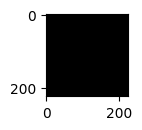

In [ ]:
# Take one batch from the dataset
for images, labels in train_ds.take(1):
    # images has shape (batch_size, height, width, channels)
    # labels has shape (batch_size,)
    
    # Get class names from the dataset
    # class_names = train_ds.class_names

    # Plot a few images from the batch
    plt.figure(figsize=(20, 10))
    for i in range(len(images)):
        ax = plt.subplot(8, 4, i + 1)  # 4x4 grid for 16 images
        plt.imshow(images[i].numpy().astype("uint8"))   # Convert tensor to array for plotting
        plt.title(class_names[labels[i]])
        plt.axis("off")
    plt.show()



###  Caching and prefetching for Efficicency
* Take your time to figure out how this is enhancing performance
    * Ensures high throughput between CPU and GPU

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache()\
                   .shuffle(buffer_size=1000)\
                   .prefetch(buffer_size=AUTOTUNE)

val_ds   = val_ds.cache()\
                 .prefetch(buffer_size=AUTOTUNE)

### Create Model

In [ ]:

BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
AUTOTUNE = tf.data.AUTOTUNE

# 1) Load data
train_ds = tf.keras.utils.image_dataset_from_directory(
    'rare_species',
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=True,
    validation_split=0.2,
    subset='training',
    seed=123
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    'rare_species',
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=True,
    validation_split=0.2,
    subset='validation',
    seed=123
)


# 3) Standardization (simple rescaling)
normalization_layer = layers.Rescaling(1./255)

# 4) Combine augmentation + standardization
train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds   = val_ds.map(lambda x, y: (normalization_layer(x), y))

# 5) Cache, shuffle, and prefetch
train_ds = train_ds.cache()\
                   .shuffle(1000)\
                   .prefetch(buffer_size=AUTOTUNE)

val_ds   = val_ds.cache()\
                 .prefetch(buffer_size=AUTOTUNE)

# 6) Example model
model = tf.keras.Sequential([
    layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.Conv2D(16, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(166, activation='softmax')  # 166 classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 7) Train
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


In [4]:
# Show all rows in value counts
pd.set_option('display.max_rows', None)
print(chordata_train['family'].value_counts())


family
dactyloidae          240
cercopithecidae      239
plethodontidae       216
salamandridae        216
carcharhinidae       213
bovidae              192
bucerotidae          167
diomedeidae          142
anatidae             138
dasyatidae           120
laridae              120
bufonidae            119
atelidae             118
callitrichidae        96
iguanidae             95
delphinidae           95
accipitridae          95
psittacidae           93
spheniscidae          92
mustelidae            72
colubridae            72
cebidae               72
ciconiidae            72
ranidae               72
acipenseridae         71
rajidae               71
procellariidae        71
geoemydidae           71
hylobatidae           71
thraupidae            70
sphyrnidae            70
myliobatidae          70
serranidae            69
trochilidae           67
cracidae              48
leporidae             48
ambystomatidae        48
cryptobranchidae      48
ardeidae              48
rhyacotritonidae  

In [5]:
chordata_train.shape, chordata_test.shape

((7868, 6), (1968, 6))

### Visualization of picture distribution for each family

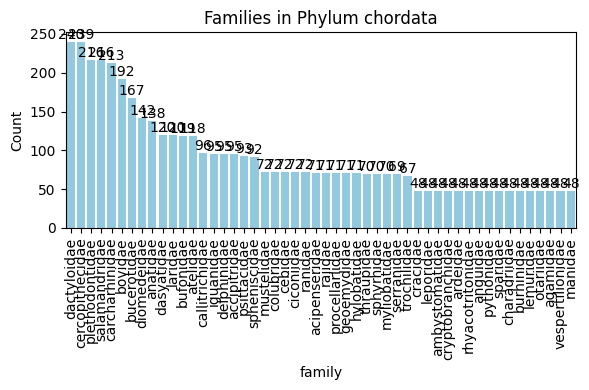

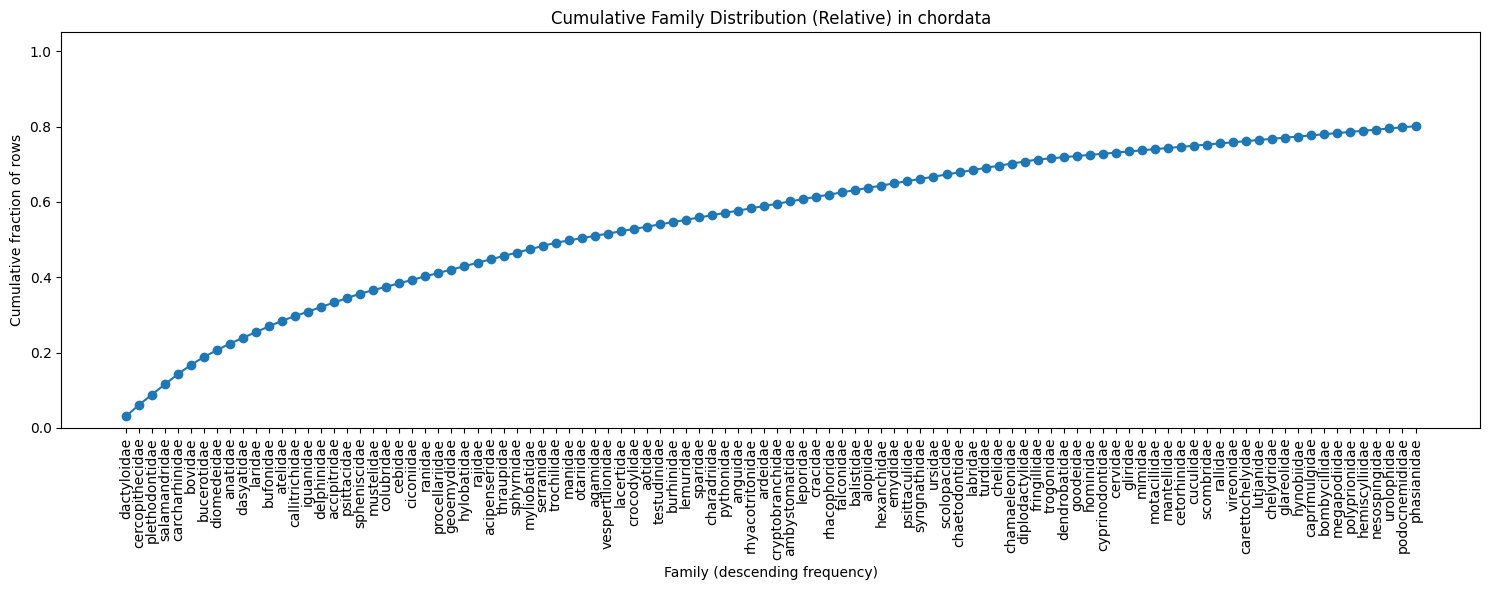

In [6]:
# Plot the amount of images per family
plot_family_distribution_by_phylum(chordata_train, selected_phylum="chordata", top_n=50)

# plot the cumulative amount of images per family ordered by the amount of images

# call the function
plot_cumulative_family_distribution(chordata_train, selected_phylum="chordata", top_n=100)

In [ ]:
# 1) Filter rows to the selected phylum
phylum_df = chordata_train[chordata_train['phylum'] == 'chordata'].copy()
    
# 2) Count the number of rows per family, then sort in descending order
family_counts = phylum_df['family'].value_counts().sort_values(ascending=False)

# 3) Optionally select only the top N families

# 4) Compute the fraction of rows each family represents
total_rows = family_counts.sum()

top_families_fraction = family_counts / total_rows

# # 5) Compute the cumulative fraction
cumulative_fraction = top_families_fraction.cumsum()

# get the families which are below 0.5
majority_classes = cumulative_fraction[cumulative_fraction < 0.5].index.tolist()

print(f'{len(majority_classes)} families represent 50% of the data. We have {len(family_counts)} families in total.')

print(f'The majority classes are: \n" {majority_classes}')

35 families represent 50% of the data. We have 166 families in total.
The majority classes are: 
" ['dactyloidae', 'cercopithecidae', 'plethodontidae', 'salamandridae', 'carcharhinidae', 'bovidae', 'bucerotidae', 'diomedeidae', 'anatidae', 'dasyatidae', 'laridae', 'bufonidae', 'atelidae', 'callitrichidae', 'iguanidae', 'delphinidae', 'accipitridae', 'psittacidae', 'spheniscidae', 'mustelidae', 'colubridae', 'cebidae', 'ciconiidae', 'ranidae', 'procellariidae', 'geoemydidae', 'hylobatidae', 'rajidae', 'acipenseridae', 'thraupidae', 'sphyrnidae', 'myliobatidae', 'serranidae', 'trochilidae', 'manidae']


# 4. Image Preprocessing <a class="anchor" id="imagepreprocessing"></a>


## 4.1. Simple Resize <a class="anchor" id="simple_resize"></a>

We’ll resize all images to a common shape to create a baseline dataset. In the process, we’ll store the original image (as a NumPy array) in a column called "original_image" and the resized version in a column called "baseline_image". This way, we keep everything in one place, and the original version can still be used for submission.

Since working with full-size images takes up a lot of memory, especially when training deep learning models, we’ll reduce the image size to 50% of the original. This helps us work faster and avoid memory issues during development.

We'll store the resized images in a new column called "resized_image_50" in the train, validation, and test datasets. These smaller versions are normalized (values between 0 and 1) and will be used for our baseline model.

In [25]:
def add_images_with_baseline(df, image_folder="rare_species", baseline_size=224, scale=0.5):
    df = df.copy()
    
    # Use an f-string to name the column dynamically
    column_name = f"baseline_image_{int(scale * 100)}"
    df[column_name] = None

    target_size = int(baseline_size * scale)

    for idx, row in df.iterrows():
        file_path = os.path.join(image_folder, row["file_path"])
        try:
            img = Image.open(file_path).convert("RGB")
            img_resized = img.resize((baseline_size, baseline_size))
            img_downscaled = img_resized.resize((target_size, target_size))
            df.at[idx, column_name] = np.array(img_downscaled)
        except Exception as e:
            print(f"Couldn't process image at {file_path}: {e}")
    
    return df

chordata_train = add_images_with_baseline(chordata_train)


### Parralelization of the function 
* use more cores
* use 

In [26]:
from concurrent.futures import ThreadPoolExecutor

def process_image(row, image_folder, baseline_size, target_size):
    try:
        file_path = os.path.join(image_folder, row["file_path"])
        with Image.open(file_path) as im:
            im = im.convert("RGB")
            img_resized = im.resize((baseline_size, baseline_size))
            img_downscaled = img_resized.resize((target_size, target_size))
            return np.array(img_downscaled)
    except Exception as e:
        print(f"Couldn't process {file_path} : {e}")
        return None

def add_images_with_baseline_parallel(df, image_folder="rare_species", baseline_size=224, scale=0.5):
    from functools import partial
    
    df = df.copy()
    column_name = f"baseline_image_{int(scale * 100)}"
    df[column_name] = None
    
    target_size = int(baseline_size * scale)

    # Convert the DataFrame rows to a list of dictionaries
    rows_as_dict = df[['file_path']].to_dict(orient='records')

    # Use a thread pool to process images in parallel
    with ThreadPoolExecutor() as executor:
        func = partial(process_image,
                       image_folder=image_folder,
                       baseline_size=baseline_size,
                       target_size=target_size)
        results = list(executor.map(func, rows_as_dict))

    df[column_name] = results
    return df


chordata_train_par = add_images_with_baseline_parallel(chordata_train)


In [31]:
chordata_train_par.head(3)

,eol_content_id,eol_page_id,kingdom,phylum,family,file_path,baseline_image_50
0,14186361,46559486,animalia,chordata,trionychidae,chordata_trionychidae/14186361_46559486_eol-fu...,"[[[208, 179, 119], [211, 182, 123], [213, 184,..."
1,29468590,4453294,animalia,chordata,cebidae,chordata_cebidae/29468590_4453294_eol-full-siz...,"[[[95, 113, 89], [80, 104, 67], [81, 100, 67],..."
2,22248395,45512569,animalia,chordata,ramphastidae,chordata_ramphastidae/22248395_45512569_eol-fu...,"[[[32, 37, 31], [32, 35, 32], [31, 36, 30], [3..."


In [ ]:
chordata_test = add_images_with_baseline(chordata_test)

In [33]:
chordata_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7868 entries, 0 to 7867
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   eol_content_id     7868 non-null   int64 
 1   eol_page_id        7868 non-null   int64 
 2   kingdom            7868 non-null   object
 3   phylum             7868 non-null   object
 4   family             7868 non-null   object
 5   file_path          7868 non-null   object
 6   baseline_image_50  7868 non-null   object
dtypes: int64(2), object(5)
memory usage: 430.4+ KB


In [30]:
chordata_train.head()

,eol_content_id,eol_page_id,kingdom,phylum,family,file_path,baseline_image_50
0,14186361,46559486,animalia,chordata,trionychidae,chordata_trionychidae/14186361_46559486_eol-fu...,"[[[208, 179, 119], [211, 182, 123], [213, 184,..."
1,29468590,4453294,animalia,chordata,cebidae,chordata_cebidae/29468590_4453294_eol-full-siz...,"[[[95, 113, 89], [80, 104, 67], [81, 100, 67],..."
2,22248395,45512569,animalia,chordata,ramphastidae,chordata_ramphastidae/22248395_45512569_eol-fu...,"[[[32, 37, 31], [32, 35, 32], [31, 36, 30], [3..."
3,29716270,51263523,animalia,chordata,dasyatidae,chordata_dasyatidae/29716270_51263523_eol-full...,"[[[3, 158, 205], [3, 143, 182], [3, 128, 175],..."
4,12281911,46559476,animalia,chordata,cheloniidae,chordata_cheloniidae/12281911_46559476_eol-ful...,"[[[191, 188, 183], [194, 191, 186], [204, 202,..."


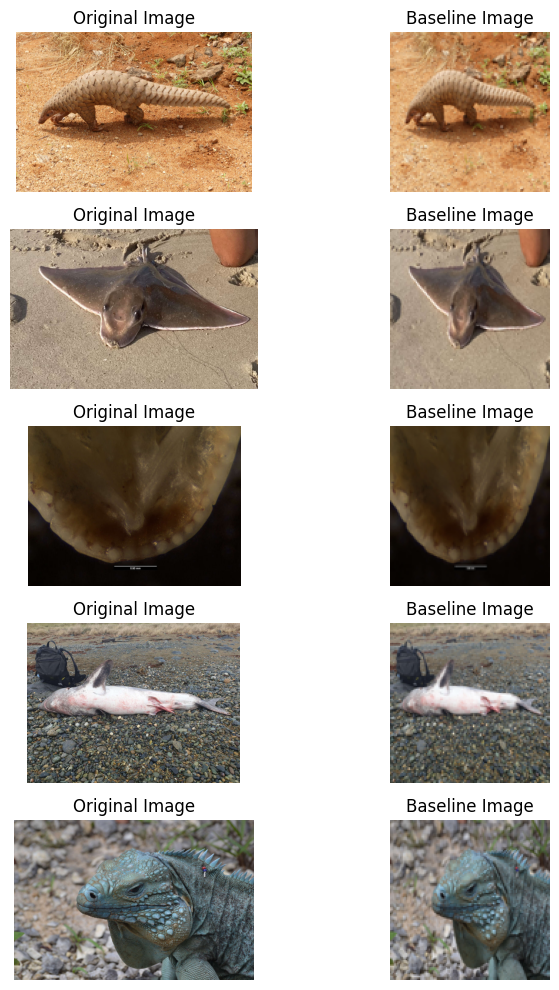

In [21]:
def show_random_image_pairs(df, image_folder="rare_species", image_column="baseline_image_50", num_samples=5):
    sample_df = df.sample(num_samples, random_state=42).reset_index(drop=True)

    fig, axes = plt.subplots(num_samples, 2, figsize=(8, 2 * num_samples))
    for i in range(num_samples):
        row = sample_df.loc[i]
        file_path = os.path.join(image_folder, row["file_path"])

        try:
            # Load original image from file
            original_img = Image.open(file_path).convert("RGB")

            # Get the baseline image from the DataFrame
            baseline_img = row[image_column]

            # Plot original image
            axes[i, 0].imshow(original_img)
            axes[i, 0].set_title("Original Image")
            axes[i, 0].axis("off")

            # Plot resized image
            axes[i, 1].imshow(baseline_img)
            axes[i, 1].set_title("Baseline Image")
            axes[i, 1].axis("off")
        except Exception as e:
            print(f"Error showing image {file_path}: {e}")

    plt.tight_layout()
    plt.show()

# Example call
show_random_image_pairs(chordata_train)

## 4.2. More Complex Preprocessing <a class="anchor" id="more_complex_preproc"></a>
After testing the model with a baseline image we will try to apply some techniques that migth improve our model, such as:
- identifying colors (if we decide to do this probably we need a hybrid model that takes the tabular data and the image as both inputs)
- change the contrast
- 

But first we need to display some random images to better understand which type of preprocessing can be done.

# 5. Prepare the Data for the Model <a class="anchor" id="prepare_data"></a>

In this section, we load the preprocessed image data and corresponding labels required for modeling our Convolutional Neural Network.

In [25]:
print(chordata_train["baseline_image_50"].shape)
print(chordata_train["baseline_image_50"][1].shape , "\n")

(7868,)
(112, 112, 3) 



In [26]:
chordata_train['family'].shape

(7868,)

# 6. Convolutional Neural Network Models <a class="anchor" id="cnnmodels"></a>

## 6.1. Baseline Model <a class="anchor" id="baseline_model"></a>

Now that we’ve defined our baseline CNN model for the Chordata phylum, we’ll: <br>
- Train it on the resized images stored in the baseline_image_50 column. <br>
- Use a validation set to monitor performance across epochs. <br>
- Save the model inside a dedicated folder: models/chordata_models. <br>
- This will help us keep our models organized as we build one per phylum.



In [ ]:
os.makedirs("models", exist_ok=True)
os.makedirs("models/chordata_models", exist_ok=True)

In [ ]:
# Prepare input shape and data
input_shape_50 = chordata_train['baseline_image_50'].iloc[0].shape

X_train = np.stack(chordata_train['baseline_image_50'].values)
X_test = np.stack(chordata_test['baseline_image_50'].values)

# Normalize image data to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

le = LabelEncoder()
y_train_encoded = le.fit_transform(chordata_train['family'])
y_test_encoded = le.transform(chordata_test['family'])

y_train_cat = to_categorical(y_train_encoded)
y_test_cat = to_categorical(y_test_encoded)

num_classes = y_train_cat.shape[1]

# Compute class weights
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_encoded),
    y=y_train_encoded
)
class_weights_dict = dict(enumerate(class_weights))

print("Class weights:", class_weights_dict)

Class weights: {0: np.float64(0.4989220038046924), 1: np.float64(0.6675716952316307), 2: np.float64(0.9874497991967871), 3: np.float64(1.9748995983935742), 4: np.float64(1.9748995983935742), 5: np.float64(2.0607647983237296), 6: np.float64(1.0084593693924635), 7: np.float64(0.9874497991967871), 8: np.float64(0.3434607997206216), 9: np.float64(0.9874497991967871), 10: np.float64(0.9874497991967871), 11: np.float64(0.9874497991967871), 12: np.float64(1.9748995983935742), 13: np.float64(0.4016744945885236), 14: np.float64(1.9748995983935742), 15: np.float64(1.9748995983935742), 16: np.float64(1.9748995983935742), 17: np.float64(1.0084593693924635), 18: np.float64(1.9748995983935742), 19: np.float64(0.24686244979919678), 20: np.float64(1.9748995983935742), 21: np.float64(0.28381790635596277), 22: np.float64(0.3982990786676116), 23: np.float64(0.9874497991967871), 24: np.float64(2.0607647983237296), 25: np.float64(0.49372489959839355), 26: np.float64(1.9748995983935742), 27: np.float64(1.97

In [ ]:
# Build the model
input_layer = Input(shape=input_shape_50)

conv1 = Conv2D(20, kernel_size=(3, 3), padding="same", activation="relu", kernel_regularizer=l2(0.001))(input_layer)
pool1 = MaxPooling2D(pool_size=(3, 3))(conv1)

conv2 = Conv2D(40, kernel_size=(3, 3), padding="same", activation="relu", kernel_regularizer=l2(0.001))(pool1)
pool2 = MaxPooling2D(pool_size=(3, 3))(conv2)

conv3 = Conv2D(60, kernel_size=(3, 3), padding="same", activation="relu", kernel_regularizer=l2(0.001))(pool2)

flatten = Flatten()(conv3)

dense1 = Dense(512, activation="relu", kernel_regularizer=l2(0.001))(flatten)
drop1 = Dropout(0.5)(dense1)

dense2 = Dense(256, activation="relu", kernel_regularizer=l2(0.001))(drop1)
drop2 = Dropout(0.5)(dense2)

output_layer = Dense(num_classes, activation="softmax")(drop2)

baseline_model = Model(inputs=input_layer, outputs=output_layer)
baseline_model.summary()

# Compile
baseline_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint = ModelCheckpoint(
    "models/chordata_models/baseline_best_model.keras",
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 112, 112, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 112, 112, 20)   │           560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 37, 37, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 37, 37, 40)     │         7,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 12, 12, 40)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 12, 12, 60)     │        21,660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 8640)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │     4,424,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 166)            │        42,662 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,627,642 (17.65 MB)

 Trainable params: 4,627,642 (17.65 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
# Train
history = baseline_model.fit(
    X_train, y_train_cat,
    epochs=40,
    batch_size=32,
    validation_data=(X_test, y_test_cat),
    class_weight=class_weights_dict,
    callbacks=[checkpoint, early_stop]
)

Epoch 1/40
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.0046 - loss: 5.6949
Epoch 1: val_loss improved from inf to 5.20736, saving model to models/chordata_models/baseline_best_model.keras
246/246 ━━━━━━━━━━━━━━━━━━━━ 44s 158ms/step - accuracy: 0.0046 - loss: 5.6938 - val_accuracy: 0.0183 - val_loss: 5.2074
Epoch 2/40
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.0107 - loss: 5.1487
Epoch 2: val_loss improved from 5.20736 to 5.14433, saving model to models/chordata_models/baseline_best_model.keras
246/246 ━━━━━━━━━━━━━━━━━━━━ 33s 132ms/step - accuracy: 0.0107 - loss: 5.1488 - val_accuracy: 0.0061 - val_loss: 5.1443
Epoch 3/40
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.0091 - loss: 5.0950
Epoch 3: val_loss improved from 5.14433 to 5.12515, saving model to models/chordata_models/baseline_best_model.keras
246/246 ━━━━━━━━━━━━━━━━━━━━ 39s 159ms/step - accuracy: 0.0091 - loss: 5.0952 - val_accuracy: 0.0030 - val_loss: 5.1252
Epoch 4/40
246/246 ━━━━━━━━━━

In [56]:
def plot_loss(history):
    """
    Plot the training and validation loss over epochs.

    Parameters:
    - history: History object returned by model.fit() containing training/validation loss values.

    Returns:
    - None (displays a plot of training and validation loss)
    """
    plt.figure(figsize=(7, 2))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    plt.show()

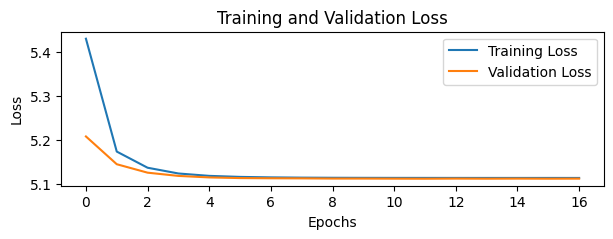

In [57]:
plot_loss(history)

When working with a model that has a large number of classes (such as 166 in this case), visualizing the entire confusion matrix may not be practical. Instead, it can be more insightful to focus on classes that the model is predicting with higher accuracy or confidence. For example, we can identify classes where the model's predictions are correct more than 50% of the time. This can give you a sense of which classes the model is performing well on and help you analyze potential areas for improvement.

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Classes with accuracy > 50%:
Class 133: 100.00% accuracy


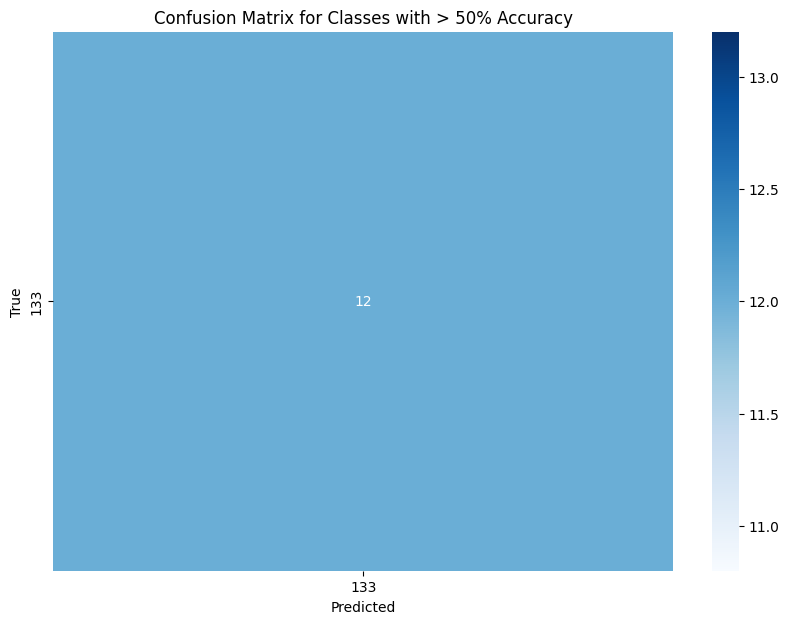

In [64]:
# Make predictions on the test set
y_pred = baseline_model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Get true class labels
y_true_class = np.argmax(y_test_cat, axis=1)  # True class labels

# Compute confusion matrix
cm = confusion_matrix(y_true_class, y_pred_class)

# Calculate accuracy per class
accuracy_per_class = np.diagonal(cm) / np.sum(cm, axis=1)

# Identify classes with accuracy > 50%
high_accuracy_classes = np.where(accuracy_per_class >= 0.01)[0]

# Display the class indices and their accuracies
print("Classes with accuracy > 50%:")
for class_idx in high_accuracy_classes:
    print(f"Class {class_idx}: {accuracy_per_class[class_idx] * 100:.2f}% accuracy")

# Optionally, plot confusion matrix (just for the selected high-accuracy classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm[high_accuracy_classes, :][:, high_accuracy_classes], annot=True, fmt='d', cmap='Blues', 
            xticklabels=high_accuracy_classes, yticklabels=high_accuracy_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Classes with > 50% Accuracy')
plt.show()

## 6.2. Baseline Model With Data Augmentation <a class="anchor" id="baseline_model_data_aug"></a>
Given the significant class imbalance in our dataset, applying data augmentation is an effective strategy to enhance model performance. Data augmentation generates synthetic variations of the training images by applying random transformations, such as rotations, shifts, and flips. This process increases the diversity of the training set, which helps the model generalize better and mitigates overfitting, especially in cases where certain classes are underrepresented.

By incorporating data augmentation, we aim to provide the model with a broader range of image variations, leading to improved robustness and performance in classifying rare species, which will ultimately help address the challenges posed by class imbalance.

In [65]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image augmentation
train_datagen = ImageDataGenerator(
    rotation_range=40,        # Random rotation
    width_shift_range=0.2,    # Random width shift
    height_shift_range=0.2,   # Random height shift
    shear_range=0.2,          # Random shear
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True,     # Random horizontal flip
    fill_mode='nearest'       # Fill mode for empty pixels after transformation
)

# Create a data generator for training data
train_generator = train_datagen.flow(X_train, y_train_cat, batch_size=32)

# Train the model with augmented data
history_data_aug = baseline_model.fit(
    train_generator,
    epochs=40,
    validation_data=(X_test, y_test_cat),
    class_weight=class_weights_dict,
    callbacks=[checkpoint, early_stop]
)

c:\Users\xandg\anaconda3\envs\deep_learning\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step - accuracy: 0.0030 - loss: 5.0851
Epoch 1: val_loss improved from 5.11142 to 5.11138, saving model to models/chordata_models/baseline_best_model.keras
246/246 ━━━━━━━━━━━━━━━━━━━━ 102s 401ms/step - accuracy: 0.0029 - loss: 5.0853 - val_accuracy: 0.0030 - val_loss: 5.1114
Epoch 2/40
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.0034 - loss: 5.1359
Epoch 2: val_loss improved from 5.11138 to 5.11110, saving model to models/chordata_models/baseline_best_model.keras
246/246 ━━━━━━━━━━━━━━━━━━━━ 75s 304ms/step - accuracy: 0.0034 - loss: 5.1359 - val_accuracy: 0.0061 - val_loss: 5.1111
Epoch 3/40
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - accuracy: 0.0089 - loss: 5.0684
Epoch 3: val_loss did not improve from 5.11110
246/246 ━━━━━━━━━━━━━━━━━━━━ 63s 257ms/step - accuracy: 0.0089 - loss: 5.0686 - val_accuracy: 0.0061 - val_loss: 5.1115
Epoch 4/40
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - accuracy: 0.0024 - loss: 5.0975
Epoch 